In [94]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
train=pd.read_csv('F:/dataquest dataset/traindata_R.csv')
test=pd.read_csv('F:/dataquest dataset/testdata_R.csv')

In [45]:
train.head()

Wife_age  Wife_education  Husband_education  Number_of_children_ever_born  \
0        24               2                  3                             3   
1        43               2                  3                             7   
2        36               3                  3                             8   
3        19               4                  4                             0   
4        38               2                  3                             6   

   Wife_religion  Wife_working  Husband_occupation  Standard_of_living_index  \
0              1             1                   2                         3   
1              1             1                   3                         4   
2              1             1                   3                         2   
3              1             1                   3                         3   
4              1             1                   3                         2   

   Media_exposure  Party_voted_for  
0               0                0  
1               0                0  
2               0                0  
3               0                0  
4               0                0

In [46]:
train.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'Number_of_children_ever_born', 'Wife_religion', 'Wife_working',
       'Husband_occupation', 'Standard_of_living_index', 'Media_exposure',
       'Party_voted_for'],
      dtype='object')

## No Missing Values

In [47]:
train.isnull().sum()

Wife_age                        0
Wife_education                  0
Husband_education               0
Number_of_children_ever_born    0
Wife_religion                   0
Wife_working                    0
Husband_occupation              0
Standard_of_living_index        0
Media_exposure                  0
Party_voted_for                 0
dtype: int64

In [48]:
test.isnull().sum()

Wife_age                        0
Wife_education                  0
Husband_education               0
Number_of_children_ever_born    0
Wife_religion                   0
Wife_working                    0
Husband_occupation              0
Standard_of_living_index        0
Media_exposure                  0
Party_voted_for                 0
dtype: int64

## Exploratory Analysis

In [49]:
pd.crosstab(train['Standard_of_living_index'],train['Party_voted_for'])

Party_voted_for             0    1
Standard_of_living_index          
1                          45   33
2                          89   83
3                         130  157
4                         158  287

In [50]:
pd.crosstab(test['Standard_of_living_index'],test['Party_voted_for'])

Party_voted_for            0    1
Standard_of_living_index         
1                         35   16
2                         28   29
3                         54   90
4                         90  149

In [51]:
train['Wife_age'].describe()

count    982.000000
mean      32.571283
std        8.145749
min       16.000000
25%       26.000000
50%       32.000000
75%       38.000000
max       49.000000
Name: Wife_age, dtype: float64

In [52]:
test['Wife_age'].describe()

count    491.000000
mean      32.472505
std        8.395866
min       16.000000
25%       25.000000
50%       32.000000
75%       39.000000
max       49.000000
Name: Wife_age, dtype: float64

In [12]:
train['Party_voted_for'].value_counts()/train.shape[0]

1    0.570265
0    0.429735
Name: Party_voted_for, dtype: float64

In [13]:
test['Party_voted_for'].value_counts()/test.shape[0]

1    0.578411
0    0.421589
Name: Party_voted_for, dtype: float64

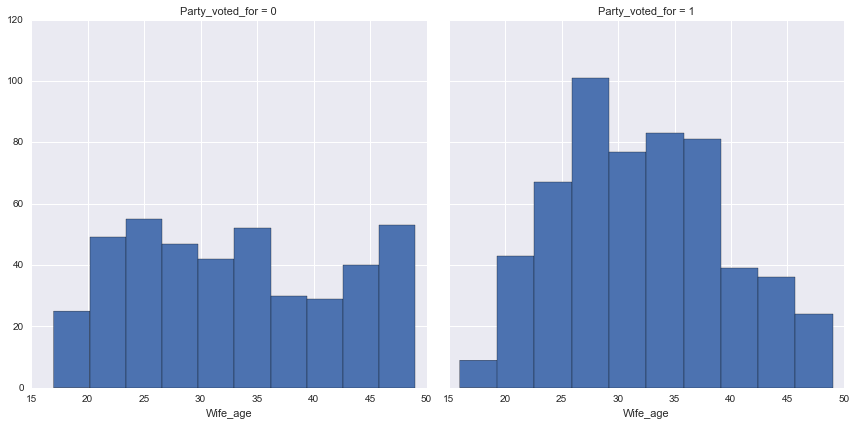

In [24]:
g=sns.FacetGrid(train,col='Party_voted_for',size=6)
g.map(plt.hist,'Wife_age')

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


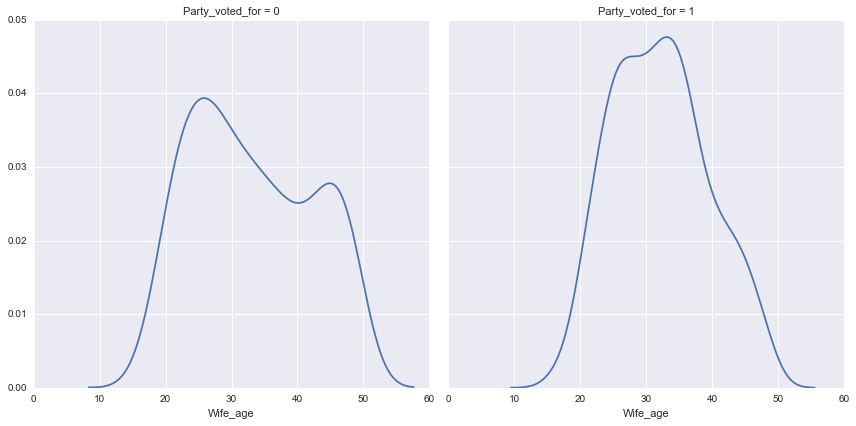

In [62]:
g=sns.FacetGrid(train,col='Party_voted_for',size=6)
g.map(sns.kdeplot,'Wife_age')

In [ ]:
# Try to find something with wife age

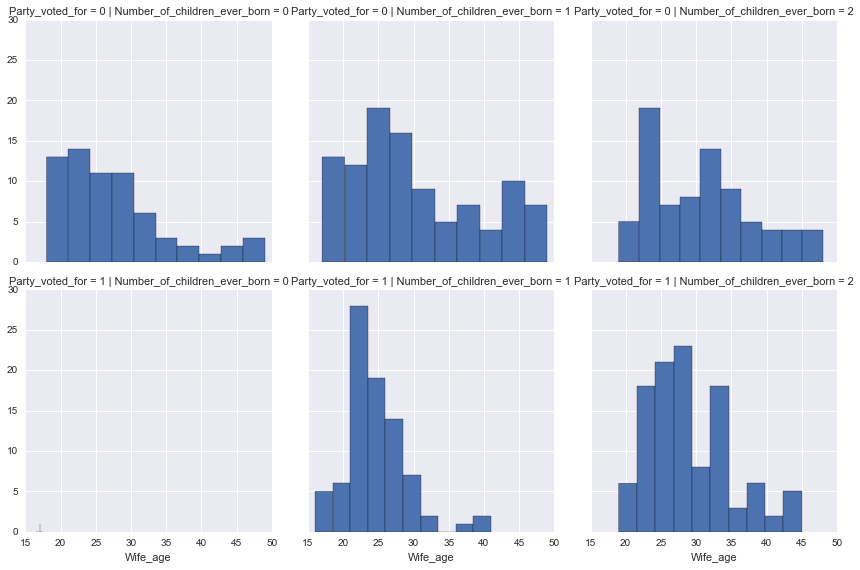

In [60]:
train_condition=train[train['Number_of_children_ever_born']<3]
g=sns.FacetGrid(train_condition,row='Party_voted_for',col='Number_of_children_ever_born',size=4,legend_out=True)
g.map(plt.hist,'Wife_age')

In [49]:
pd.crosstab(train['Number_of_children_ever_born'],train['Party_voted_for'],margins=True)

Party_voted_for                 0    1  All
Number_of_children_ever_born               
0                              66    1   67
1                             102   84  186
2                              79  110  189
3                              47  131  178
4                              32   97  129
5                              29   54   83
6                              22   34   56
7                              12   22   34
8                              20   14   34
9                               3    9   12
10                              4    1    5
11                              5    2    7
12                              1    0    1
16                              0    1    1
All                           422  560  982

In [76]:
##lets try to reduce  the no. of children ever born from 9,10..16 to just one category be it 9, tried but didn't seem to affect the result

#train.loc[train['Number_of_children_ever_born']==9,'Number_of_children_ever_born']=9
#train.loc[train['Number_of_children_ever_born']==10,'Number_of_children_ever_born']=9
train.loc[train['Number_of_children_ever_born']==11,'Number_of_children_ever_born']=11
train.loc[train['Number_of_children_ever_born']==12,'Number_of_children_ever_born']=11
train.loc[train['Number_of_children_ever_born']==16,'Number_of_children_ever_born']=11

In [77]:
#test.loc[test['Number_of_children_ever_born']==9,'Number_of_children_ever_born']=9
#test.loc[test['Number_of_children_ever_born']==10,'Number_of_children_ever_born']=9
test.loc[test['Number_of_children_ever_born']==11,'Number_of_children_ever_born']=11
test.loc[test['Number_of_children_ever_born']==12,'Number_of_children_ever_born']=11
test.loc[test['Number_of_children_ever_born']==13,'Number_of_children_ever_born']=11

In [ ]:
## In order to better visualise the plots for different Number of children

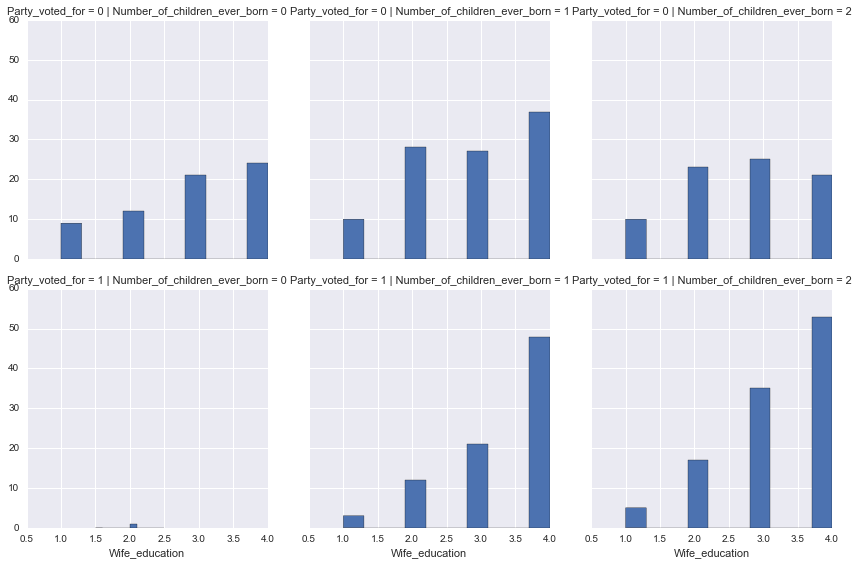

In [44]:
train_condition=train[train['Number_of_children_ever_born']<3]
g=sns.FacetGrid(train_condition,row='Party_voted_for',col='Number_of_children_ever_born',size=4,legend_out=True)
g.map(plt.hist,'Wife_education')

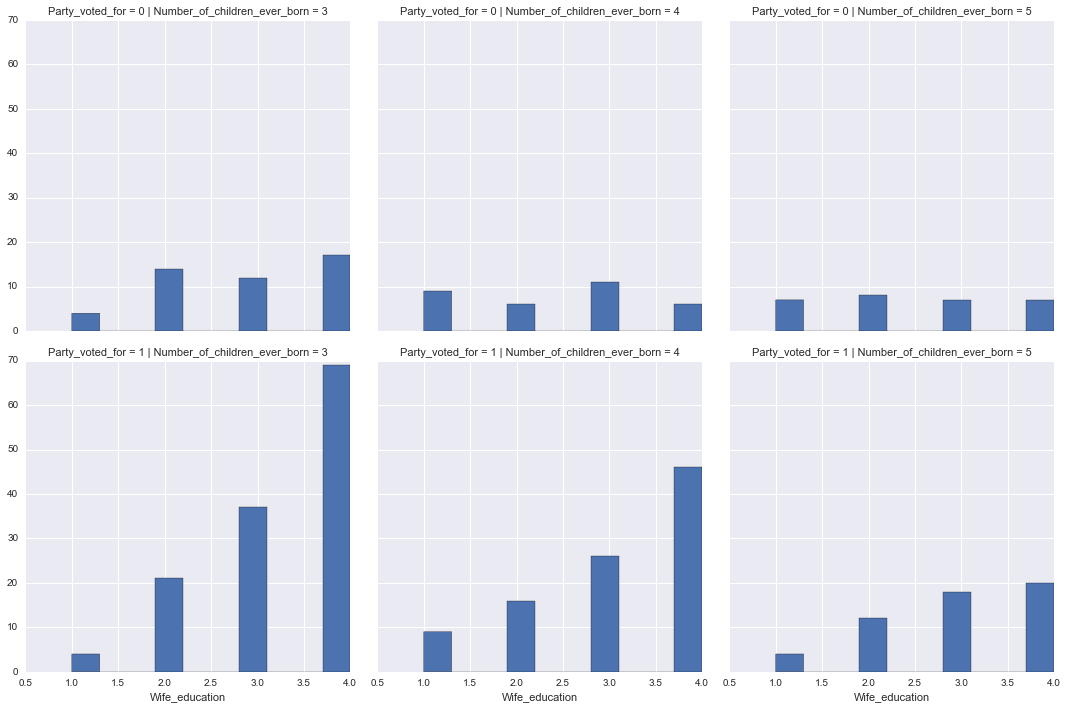

In [42]:
train_condition=train[(train['Number_of_children_ever_born']>=3)&(train['Number_of_children_ever_born']<6)]
g=sns.FacetGrid(train_condition,row='Party_voted_for',col='Number_of_children_ever_born',size=5,legend_out=True)
g.map(plt.hist,'Wife_education')

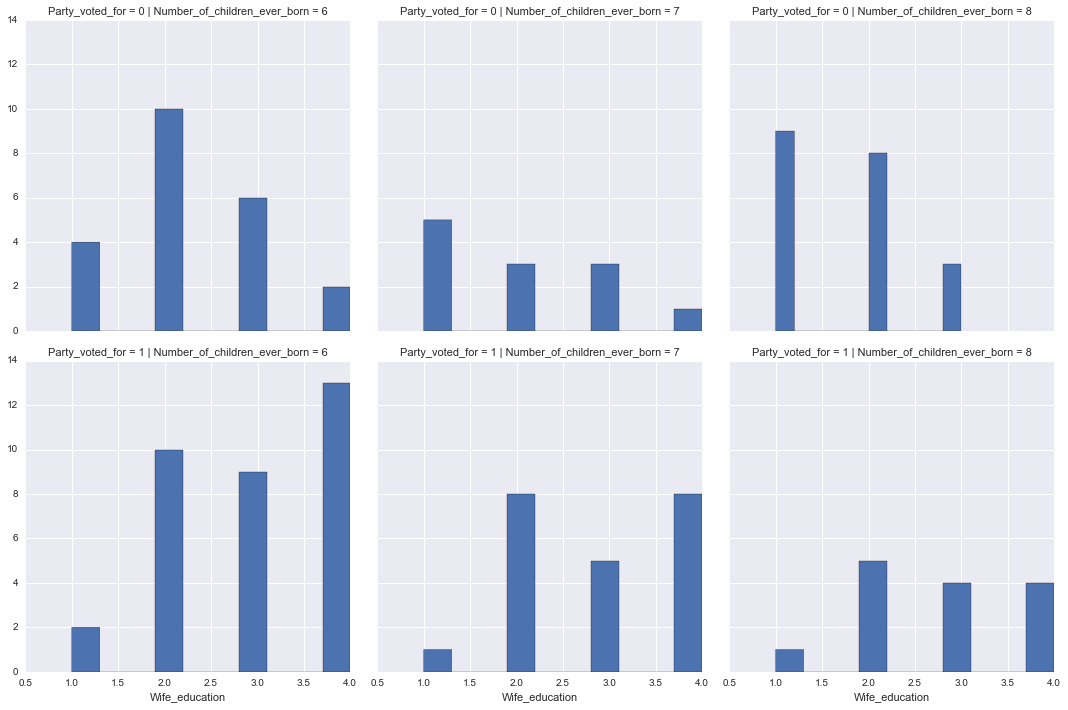

In [45]:
train_condition=train[(train['Number_of_children_ever_born']>=6)&(train['Number_of_children_ever_born']<9)]
g=sns.FacetGrid(train_condition,row='Party_voted_for',col='Number_of_children_ever_born',size=5,legend_out=True)
g.map(plt.hist,'Wife_education')

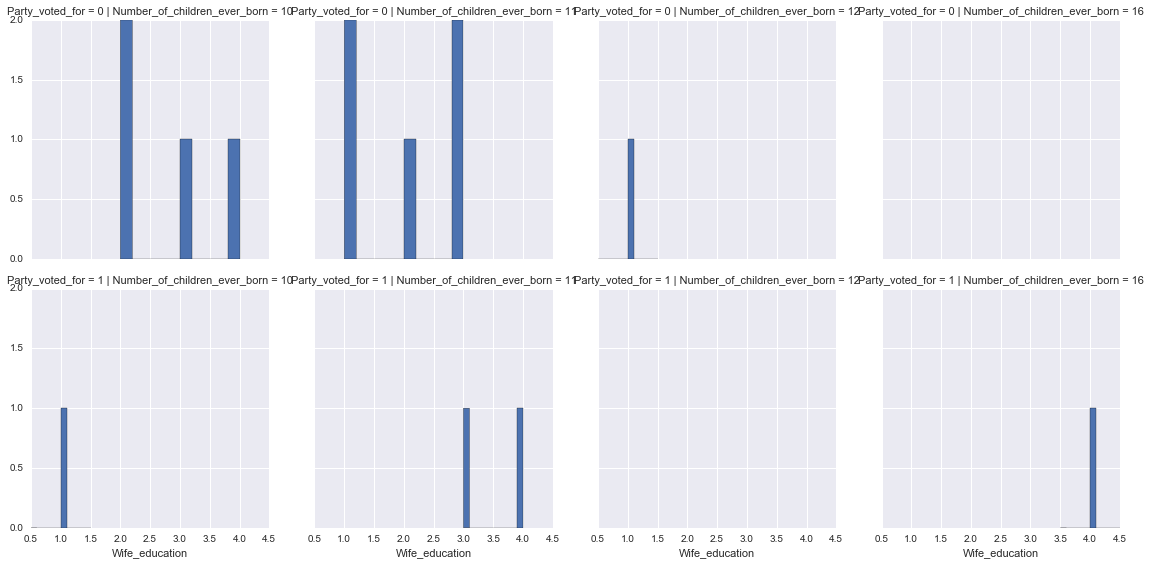

In [52]:
train_condition=train[(train['Number_of_children_ever_born']>9)&(train['Number_of_children_ever_born']<=16)]
g=sns.FacetGrid(train_condition,row='Party_voted_for',col='Number_of_children_ever_born',size=4,legend_out=True)
g.map(plt.hist,'Wife_education')

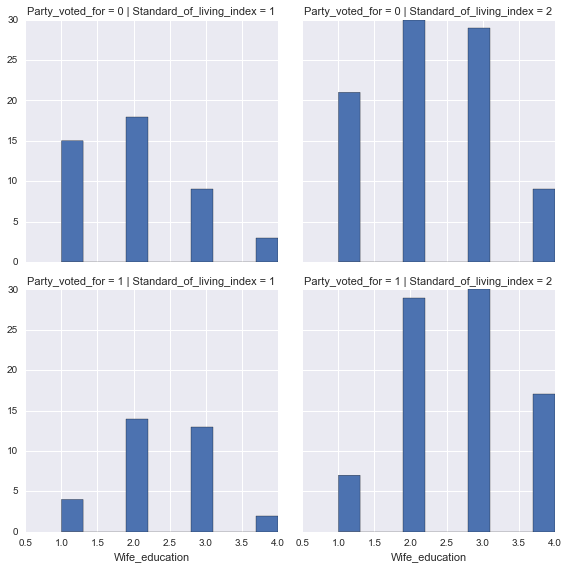

In [98]:
train_condition=train[(train['Standard_of_living_index']<3)]
g=sns.FacetGrid(train_condition,row='Party_voted_for',col='Standard_of_living_index',size=4,legend_out=True)
g.map(plt.hist,'Wife_education')

In [103]:
# There seems to be some outlier here 
train[(train['Wife_education']==1)&(train['Party_voted_for']==1)&(train['Standard_of_living_index']==1)]

Wife_age  Wife_education  Husband_education  \
495        25               1                  2   
556        41               1                  4   
857        35               1                  2   
921        36               1                  2   

     Number_of_children_ever_born  Wife_religion  Wife_working  \
495                             2              1             1   
556                             9              1             1   
857                             9              1             0   
921                             4              1             1   

     Husband_occupation  Standard_of_living_index  Media_exposure  \
495                   2                         1               0   
556                   2                         1               0   
857                   3                         1               0   
921                   3                         1               1   

     Party_voted_for  
495                1  
556                1  
857                1  
921                1

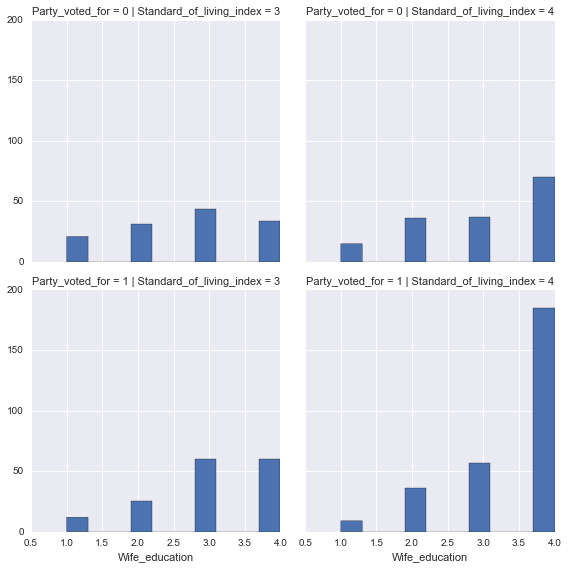

In [101]:
train_condition=train[(train['Standard_of_living_index']>=3)]
g=sns.FacetGrid(train_condition,row='Party_voted_for',col='Standard_of_living_index',size=4,legend_out=True)
g.map(plt.hist,'Wife_education')

In [ ]:
## There are only 11 dataset for no. of children >=11

In [100]:
train_condition=train[(train['Number_of_children_ever_born']>=11)]
train_condition.head()

Wife_age  Wife_education  Husband_education  \
128        44               1                  1   
136        42               1                  4   
170        46               3                  2   
380        49               3                  3   
450        48               4                  4   

     Number_of_children_ever_born  Wife_religion  Wife_working  \
128                            11              1             1   
136                            11              0             1   
170                            11              1             0   
380                            11              1             1   
450                            16              1             1   

     Husband_occupation  Standard_of_living_index  Media_exposure  \
128                   4                         1               1   
136                   2                         2               1   
170                   2                         2               1   
380                   1                         4               0   
450                   1                         4               0   

     Party_voted_for  
128                0  
136                0  
170                0  
380                1  
450                1

In [78]:
# lets get the women who had no children but voted to party 1 
# As she seems to be the outlier in our case or maybe an undecided voter or a fence sitter
train[(train['Number_of_children_ever_born']==0)&(train['Party_voted_for']==1)]

Wife_age  Wife_education  Husband_education  \
632        17               2                  2   

     Number_of_children_ever_born  Wife_religion  Wife_working  \
632                             0              1             0   

     Husband_occupation  Standard_of_living_index  Media_exposure  \
632                   3                         2               0   

     Party_voted_for  
632                1

In [79]:
train[(train['Number_of_children_ever_born']==1)&(train['Party_voted_for']==1)&(train['Wife_education']==1)]

Wife_age  Wife_education  Husband_education  \
316        24               1                  4   
592        21               1                  3   
910        29               1                  2   

     Number_of_children_ever_born  Wife_religion  Wife_working  \
316                             1              1             0   
592                             1              1             1   
910                             1              1             1   

     Husband_occupation  Standard_of_living_index  Media_exposure  \
316                   4                         2               1   
592                   3                         3               1   
910                   3                         3               0   

     Party_voted_for  
316                1  
592                1  
910                1

In [104]:
train=train.drop(train.index[[632,316,592,910,495,556,857,921]])
train=train.reset_index(drop=True)
train.shape[0]

974

In [105]:
pd.crosstab(train['Media_exposure'],train['Party_voted_for'])

Party_voted_for    0    1
Media_exposure           
0                366  531
1                 56   21

In [ ]:
g=sns.FacetGrid(train,col='Party_voted_for',size=6)
g.map(plt.hist,'Wife_education')

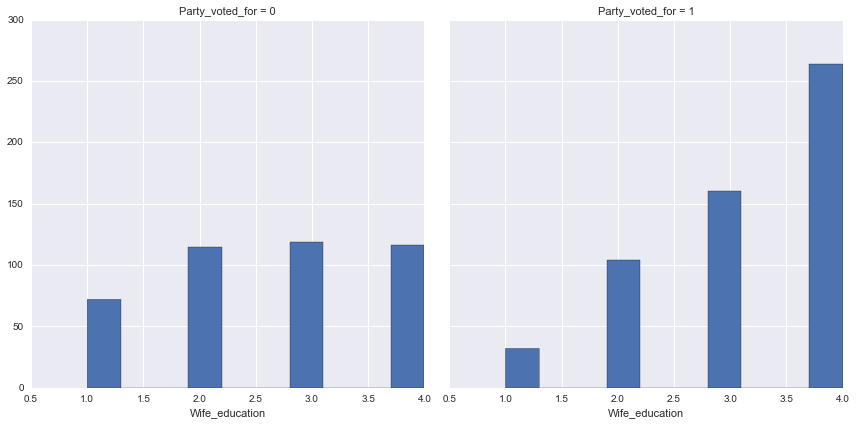

In [25]:
g=sns.FacetGrid(train,col='Party_voted_for',size=6)
g.map(plt.hist,'Wife_education')

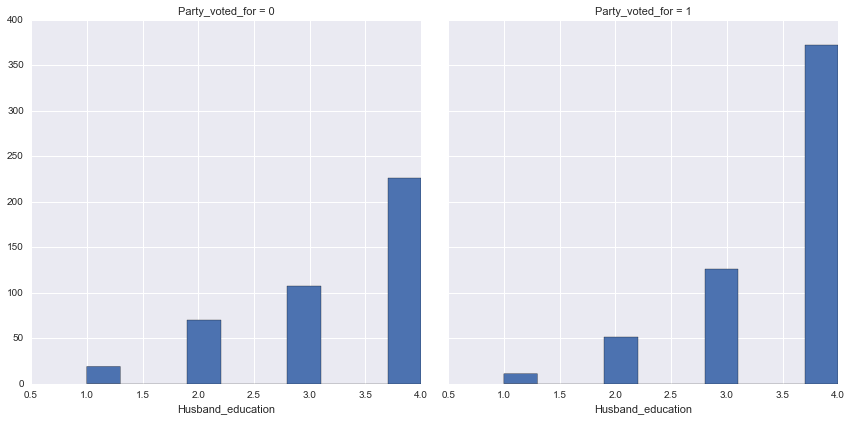

In [48]:
g=sns.FacetGrid(train,col='Party_voted_for',size=6)
g.map(plt.hist,'Husband_education')

### Adding New Features

In [106]:
train['Education']=train['Wife_education']+train['Husband_education']
test['Education']=test['Wife_education']+test['Husband_education']

In [107]:
pd.crosstab(train['Education'],train['Party_voted_for'])

Party_voted_for    0    1
Education                
2                 15    4
3                 30   11
4                 52   42
5                 66   50
6                 77   96
7                 69  102
8                113  247

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import metrics

In [109]:
features=['Wife_age', 'Wife_education', 'Husband_education',
       'Number_of_children_ever_born', 'Wife_religion', 'Wife_working',
       'Husband_occupation', 'Standard_of_living_index', 'Media_exposure',
       'Education']
target=['Party_voted_for']          

## Building a Classification Model

1. Problems- As for a binary classification model we have a threshhold =0.5 and changing that is a business decision. 
2. In this case we are concerned to correctly predict the no. of votes received by Culter 
3. Thus what we want is a lower no. of False Positive Rate(actual 0....predicted 1)
4. Thus we can also tweak with the threshold 

### Logistic Regression Model

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The f1_score of the model is 0.769716088328
The accuracy of the model is 0.702647657841


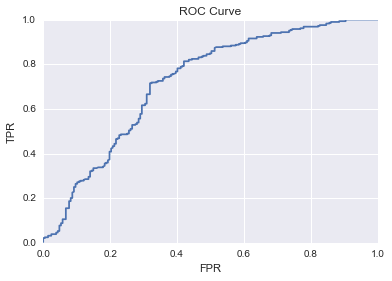

The auc score of the model is 0.719398516704


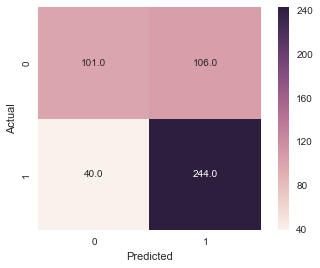

In [110]:
lr=LogisticRegression(random_state=11)
lr.fit(train[features],train[target])
predictions=lr.predict(test[features])
prob=lr.predict_proba(test[features])
print('The f1_score of the model is',f1_score(predictions,test[target]))
print('The accuracy of the model is',metrics.accuracy_score(test[target],predictions))
fpr1,tpr1,threshold=metrics.roc_curve(test[target],prob[:,1])
plt.plot(fpr1,tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()
print('The auc score of the model is',metrics.roc_auc_score(test[target], prob[:,1]))
cm=metrics.confusion_matrix(test[target],predictions)
sns.heatmap(cm,square=True,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## DecisionTree Model

The f1_score of the model is 0.78955453149
The accuracy of the model is 0.720977596741


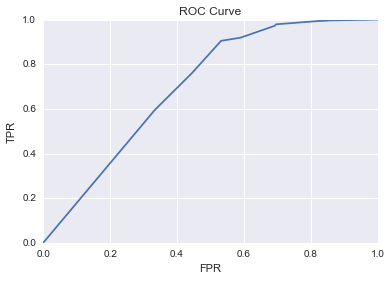

The auc score of the model is 0.702566850378


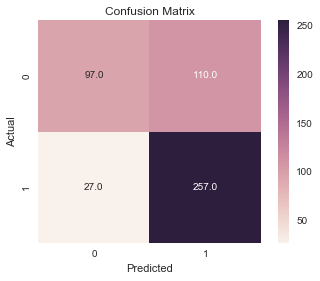

In [111]:
lr=DecisionTreeClassifier(max_depth=4,random_state=13)
lr.fit(train[features],train[target])
predictions=lr.predict(test[features])
prob=lr.predict_proba(test[features])
print('The f1_score of the model is',f1_score(predictions,test[target]))
print('The accuracy of the model is',metrics.accuracy_score(test[target],predictions))
fpr2,tpr2,threshold=metrics.roc_curve(test[target],prob[:,1])
plt.show()
plt.plot(fpr2,tpr2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()
print('The auc score of the model is',metrics.roc_auc_score(test[target], prob[:,1]))
cm=metrics.confusion_matrix(test[target],predictions)
sns.heatmap(cm,square=True,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

### Trained Model using Random Forest
1. Plotting threshold vs fpr
2. Plotting threshold vs tpr
3. Tweaked the threshold to reduce the no. of false positive case and increase the no. of true negatives
3. The value of threshold is a business decision
4. In this problem we want to increse the no. of correct votes received by Culter
5. Here we should try to increse the value of threshold 

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


The f1_score of the model is 0.873977086743
The accuracy of the model is 0.841889117043


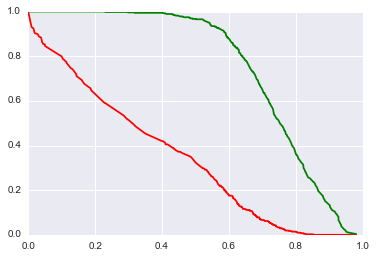

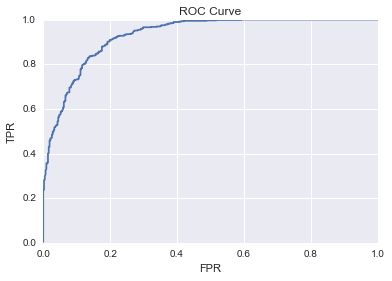

The auc score of the model is 0.929208307576


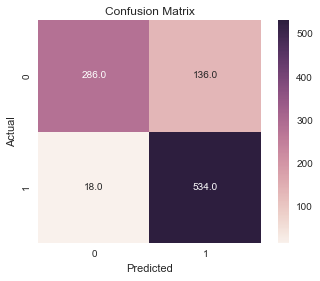

In [116]:
lr=RandomForestClassifier(max_depth=9,random_state=13)
lr.fit(train[features],train[target])
predictions=lr.predict(train[features])
prob=lr.predict_proba(train[features])
predictions=[]
# We try to inc the threhold to reduce the fpr
for i in prob[:,1]:
    if i>=0.5:
        predictions.append(1)
    else:
        predictions.append(0)
print('The f1_score of the model is',f1_score(predictions,train[target]))
print('The accuracy of the model is',metrics.accuracy_score(train[target],predictions))
fpr,tpr,threshold=metrics.roc_curve(train[target],prob[:,1])
plt.plot(threshold,fpr,c='r')
plt.plot(threshold,tpr,c='g')
plt.show()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()
print('The auc score of the model is',metrics.roc_auc_score(train[target], prob[:,1]))
cm=metrics.confusion_matrix(train[target],predictions)
sns.heatmap(cm,square=True,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

### Applying the Model RandomForest on the Test Data

The f1_score of the model is 0.774091627172
The accuracy of the model is 0.708757637475


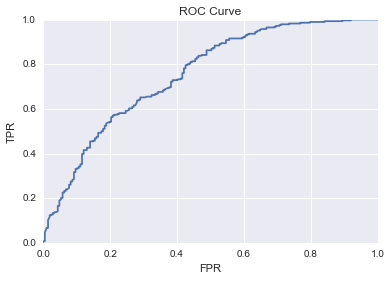

The auc score of the model is 0.754592774036


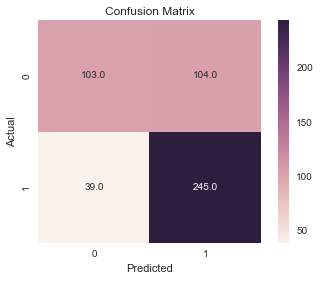

In [130]:
predictions=lr.predict(test[features])
prob=lr.predict_proba(test[features])
predictions=[]
for i in prob[:,1]:
    if i>=.5:
        predictions.append(1)
    else:
        predictions.append(0)
print('The f1_score of the model is',f1_score(predictions,test[target]))
print('The accuracy of the model is',metrics.accuracy_score(test[target],predictions))
fpr3,tpr3,threshold=metrics.roc_curve(test[target],prob[:,1])
plt.plot(fpr3,tpr3)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()
print('The auc score of the model is',metrics.roc_auc_score(test[target], prob[:,1]))
cm=metrics.confusion_matrix(test[target],predictions)
sns.heatmap(cm,square=True,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

The f1_score of the model is 0.720562390158
The accuracy of the model is 0.67617107943


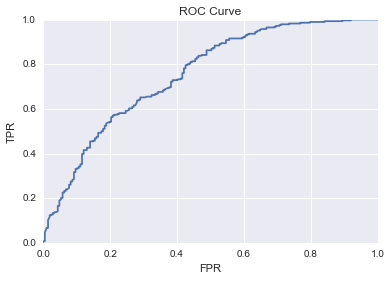

The auc score of the model is 0.754592774036


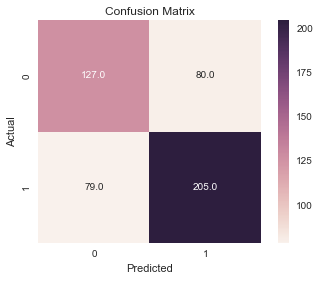

In [131]:
predictions=lr.predict(test[features])
prob=lr.predict_proba(test[features])
predictions=[]
for i in prob[:,1]:
    if i>=0.595:
        predictions.append(1)
    else:
        predictions.append(0)
print('The f1_score of the model is',f1_score(predictions,test[target]))
print('The accuracy of the model is',metrics.accuracy_score(test[target],predictions))
fpr3,tpr3,threshold=metrics.roc_curve(test[target],prob[:,1])
plt.plot(fpr3,tpr3)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()
print('The auc score of the model is',metrics.roc_auc_score(test[target], prob[:,1]))
cm=metrics.confusion_matrix(test[target],predictions)
sns.heatmap(cm,square=True,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

#### Results
1. Out of 207 votes that is received by Culter we predict 209 votes would be received
2. Though there is a catch here
3. We have correctly predicted only 130(True Negatives) votes but there is 79 votes which are false_negative.
4. This might not be the best model but out of Logistic and Decision Tree this  is the best one

## Contains answers to assignment questions

### Part 1: Data manipulation and summary statistics
Q1. For the women in the train dataset find the following variables for every category of education.  
1.	Count of people
2.	Average age
3.	Average number of children
4.	Percentage of women who are working
5.	Percentage of women who have a high standard of living (Standard_of_living_index = 4)
There are 4 categories for Wife_education and 5 variables required, so you should get 20 values. It is advised to represent all the numbers in a single dataframe. 


## Contains the answers in a DataFrame as well

In [38]:
train['Wife_education'].value_counts()

4    380
3    279
2    219
1    104
Name: Wife_education, dtype: int64

In [39]:
print('The mean of age when education category is 1: ',train[(train['Wife_education']==1)]['Wife_age'].mean())
print('The mean of age when education category is 2: ',train[(train['Wife_education']==2)]['Wife_age'].mean())
print('The mean of age when education category is 3: ',train[(train['Wife_education']==3)]['Wife_age'].mean())
print('The mean of age when education category is 4: ',train[(train['Wife_education']==4)]['Wife_age'].mean())

The mean of age when education category is 1:  38.09615384615385
The mean of age when education category is 2:  31.45662100456621
The mean of age when education category is 3:  30.22222222222222
The mean of age when education category is 4:  33.42631578947368


In [40]:
print('The avereage number of children when education category is 1: ',train[(train['Wife_education']==1)]
      ['Number_of_children_ever_born'].mean())
print('The avereage number of children when education category is 2: ',train[(train['Wife_education']==2)]
      ['Number_of_children_ever_born'].mean())
print('The avereage number of children when education category is 3: ',train[(train['Wife_education']==3)]
      ['Number_of_children_ever_born'].mean())
print('The avereage number of children when education category is 4: ',train[(train['Wife_education']==4)]
      ['Number_of_children_ever_born'].mean())


The avereage number of children when education category is 1:  4.153846153846154
The avereage number of children when education category is 2:  3.4840182648401825
The avereage number of children when education category is 3:  3.1469534050179213
The avereage number of children when education category is 4:  2.8026315789473686


In [41]:
print('The percentage of working women for different education category: ',(train[(train['Wife_education']==1)]
                                                                            ['Wife_working']==1).sum()/train[(train['Wife_education']==1)].shape[0])
print('The percentage of working women for different education category: ',(train[(train['Wife_education']==2)]
                                                                            ['Wife_working']==1).sum()/train[(train['Wife_education']==2)].shape[0])
print('The percentage of working women for different education category: ',(train[(train['Wife_education']==3)]
                                                                            ['Wife_working']==1).sum()/train[(train['Wife_education']==3)].shape[0])
print('The percentage of working women for different education category: ',(train[(train['Wife_education']==4)]
                                                                            ['Wife_working']==1).sum()/train[(train['Wife_education']==4)].shape[0])

The percentage of working women for different education category:  0.759615384615
The percentage of working women for different education category:  0.762557077626
The percentage of working women for different education category:  0.784946236559
The percentage of working women for different education category:  0.694736842105


In [42]:
print('The percentage of women who have high standard of living for different education category: ',(train[(train['Wife_education']==1)]
                                                                                                     ['Standard_of_living_index']==4).sum()/len(train[train['Wife_education']==1]))
print('The percentage of women who have high standard of living for different education category: ',(train[(train['Wife_education']==2)]
                                                                                                     ['Standard_of_living_index']==4).sum()/train[(train['Wife_education']==2)].shape[0])
print('The percentage of women who have high standard of living for different education category: ',(train[(train['Wife_education']==3)]
                                                                                                     ['Standard_of_living_index']==4).sum()/train[(train['Wife_education']==3)].shape[0])
print('The percentage of women who have high standard of living for different education category: ',(train[(train['Wife_education']==4)]
                                                                                                     ['Standard_of_living_index']==4).sum()/train[(train['Wife_education']==4)].shape[0])

The percentage of women who have high standard of living for different education category:  0.230769230769
The percentage of women who have high standard of living for different education category:  0.328767123288
The percentage of women who have high standard of living for different education category:  0.336917562724
The percentage of women who have high standard of living for different education category:  0.671052631579


In [43]:
average_age=[]
average_children=[]
per_working=[]
per_standard=[]
for i in range(1,5):
    average_age.append(train[(train['Wife_education']==i)]['Wife_age'].mean())
    average_children.append(train[(train['Wife_education']==i)]['Number_of_children_ever_born'].mean())
    per_working.append((train[(train['Wife_education']==i)]['Wife_working']==1).sum()/
                       len(train[(train['Wife_education']==i)]))
    per_standard.append((train[(train['Wife_education']==i)]['Standard_of_living_index']==4).sum()/
                        len(train[train['Wife_education']==i]))
   

In [44]:
raw_data={'Education_Category':[1,2,3,4],'Count':[104,219,279,380],'Average_age':average_age,'Average_children':average_children,
          'Percentage_working_women':per_working,'per_standard_living':per_standard}

In [45]:
data_frame=pd.DataFrame(raw_data,columns=['Education_Category','Count','Average_age','Average_children','Percentage_working_women','per_standard_living'])
data_frame

Education_Category  Count  Average_age  Average_children  \
0                   1    104    38.096154          4.153846   
1                   2    219    31.456621          3.484018   
2                   3    279    30.222222          3.146953   
3                   4    380    33.426316          2.802632   

   Percentage_working_women  per_standard_living  
0                  0.759615             0.230769  
1                  0.762557             0.328767  
2                  0.784946             0.336918  
3                  0.694737             0.671053

### Part 2 has been answered 

### Part 3

###  For the 3 models trained in Part 2, create their respective ROC curves and display it on one graph. Specify different colours for each graph for ease in comparison. Which is the best model among the three?

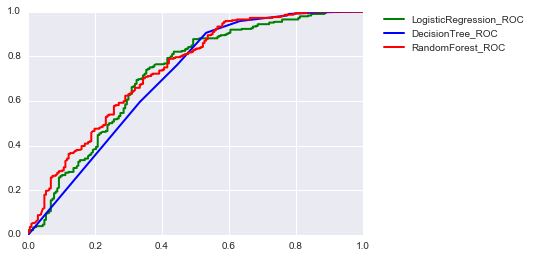

In [37]:
plt.plot(fpr1,tpr1,c='g',label='LogisticRegression_ROC',linewidth=2)
plt.plot(fpr2,tpr2,c='b',label='DecisionTree_ROC',linewidth=2)
plt.plot(fpr3,tpr3,c='r',label='RandomForest_ROC',linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Random Forest is the best model in this case